In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [22]:
file_path = '/content/MathE dataset (4).csv'
dataset = pd.read_csv(file_path, delimiter=';', encoding='ISO-8859-1')



 use delimiter=';' because of this csv file include ; instead of ,


 use encoding='ISO-8859-1' because of this csv file include some characters couldn't be interpreted correctly in UTF-8 format


# Data visualisation

# Visualize the distribution of students by country

### Using a map visualization technique

In [23]:
import plotly.express as px

country_counts = dataset['Student Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Create a choropleth map
fig = px.choropleth(country_counts,
                    locations="Country",
                    locationmode='country names',
                    color="Count",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Student Distribution by Country")


fig.show()


this use when dealing with geographical data or location-based analysis

### Using chart visualization technique

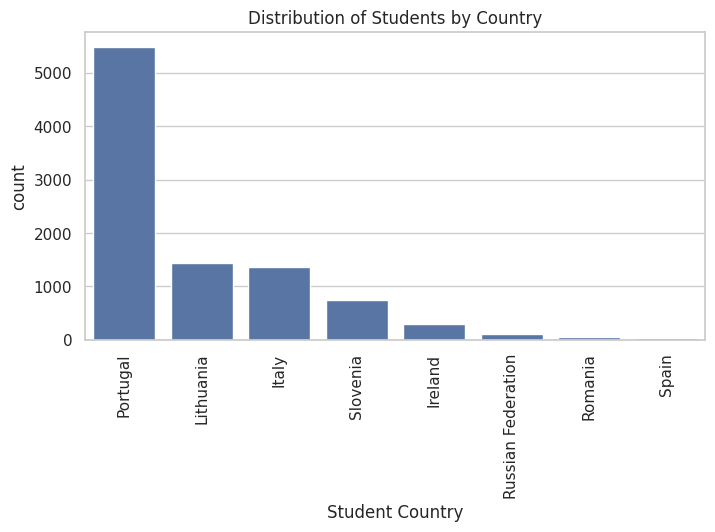

In [24]:
plt.figure(figsize=(8, 4))
sns.countplot(data=dataset, x='Student Country', order=dataset['Student Country'].value_counts().index)
plt.title('Distribution of Students by Country')
plt.xticks(rotation=90)
plt.show()


# Visualize the distribution of correct (1) vs incorrect (0) answers(bar plot)

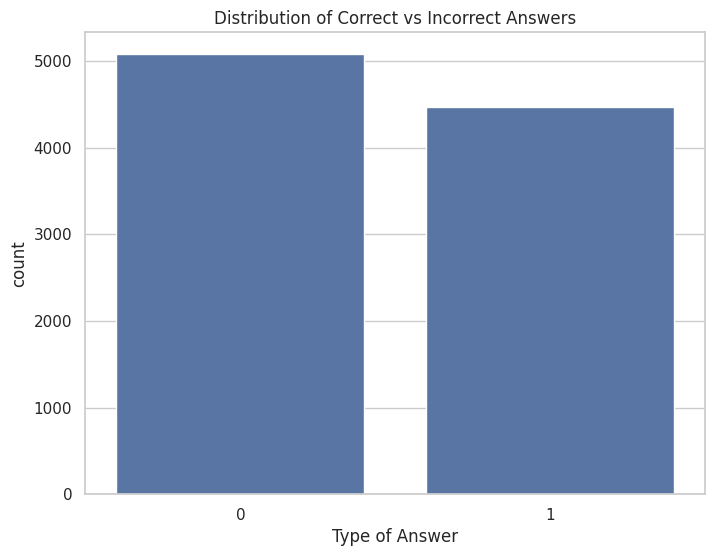

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Type of Answer')
plt.title('Distribution of Correct vs Incorrect Answers')
plt.show()


# Visualize the Performance comparison across Basic and Advanced levels

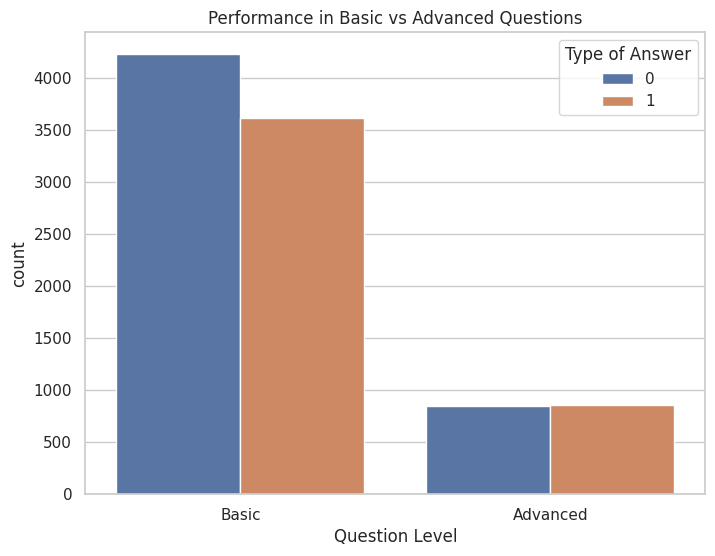

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Question Level', hue='Type of Answer')
plt.title('Performance in Basic vs Advanced Questions')
plt.show()


# Distribution Analysis

# Distribution of Question IDs

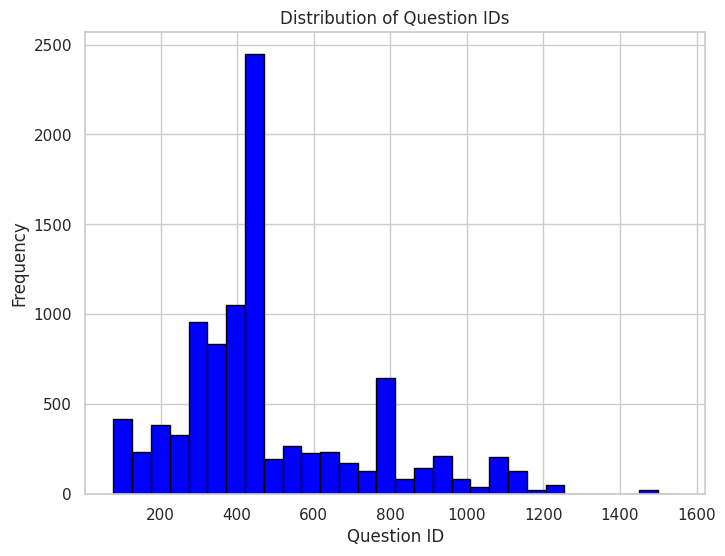

In [27]:
plt.figure(figsize=(8, 6))
plt.hist(dataset['Question ID'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Question IDs')
plt.xlabel('Question ID')
plt.ylabel('Frequency')
plt.show()


# Distribution of Question IDs by Question Level

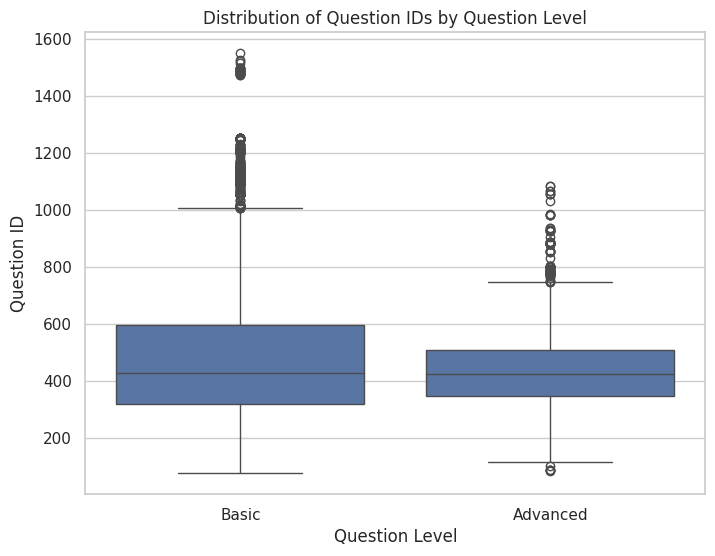

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='Question Level', y='Question ID')
plt.title('Distribution of Question IDs by Question Level')
plt.show()


# Distribution of questions across topics

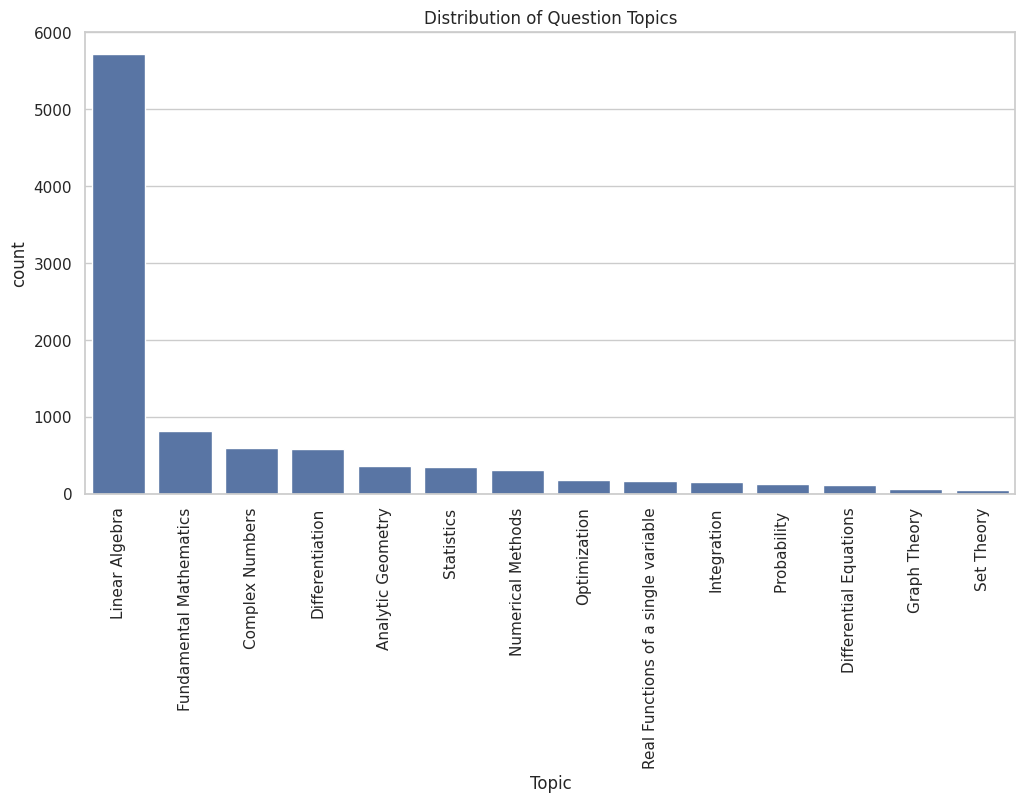

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='Topic', order=dataset['Topic'].value_counts().index)
plt.title('Distribution of Question Topics')
plt.xticks(rotation=90)
plt.show()


In [30]:
topic_performance =dataset.groupby('Topic')['Type of Answer'].mean().sort_values(ascending=False)

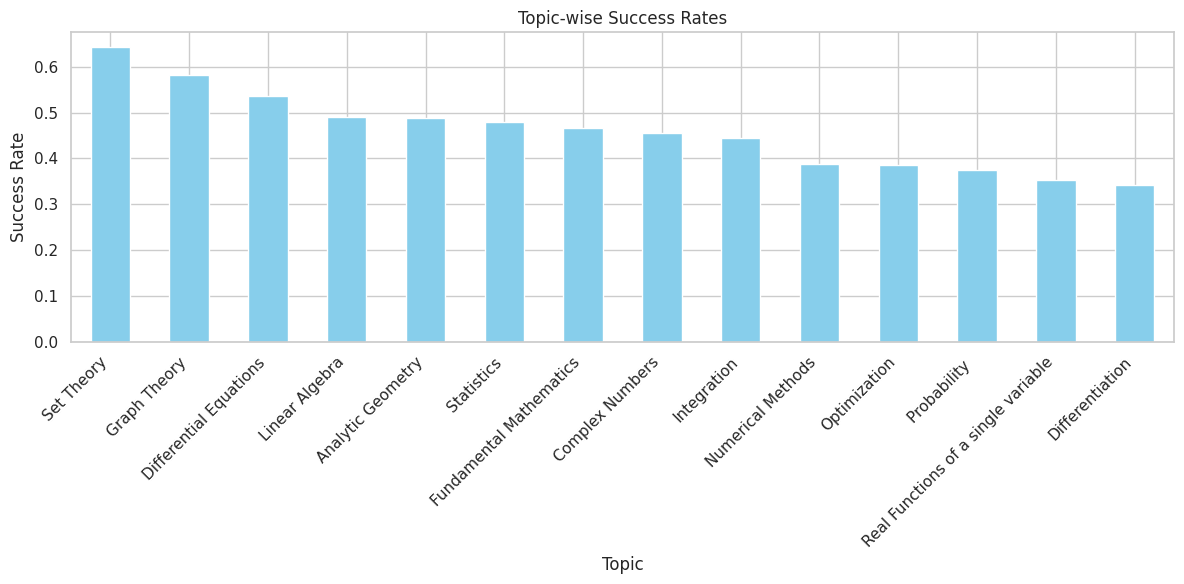

In [31]:
plt.figure(figsize=(12, 6))
topic_performance.plot(kind='bar', color='skyblue')
plt.title('Topic-wise Success Rates')
plt.xlabel('Topic')
plt.ylabel('Success Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of questions across subtopics

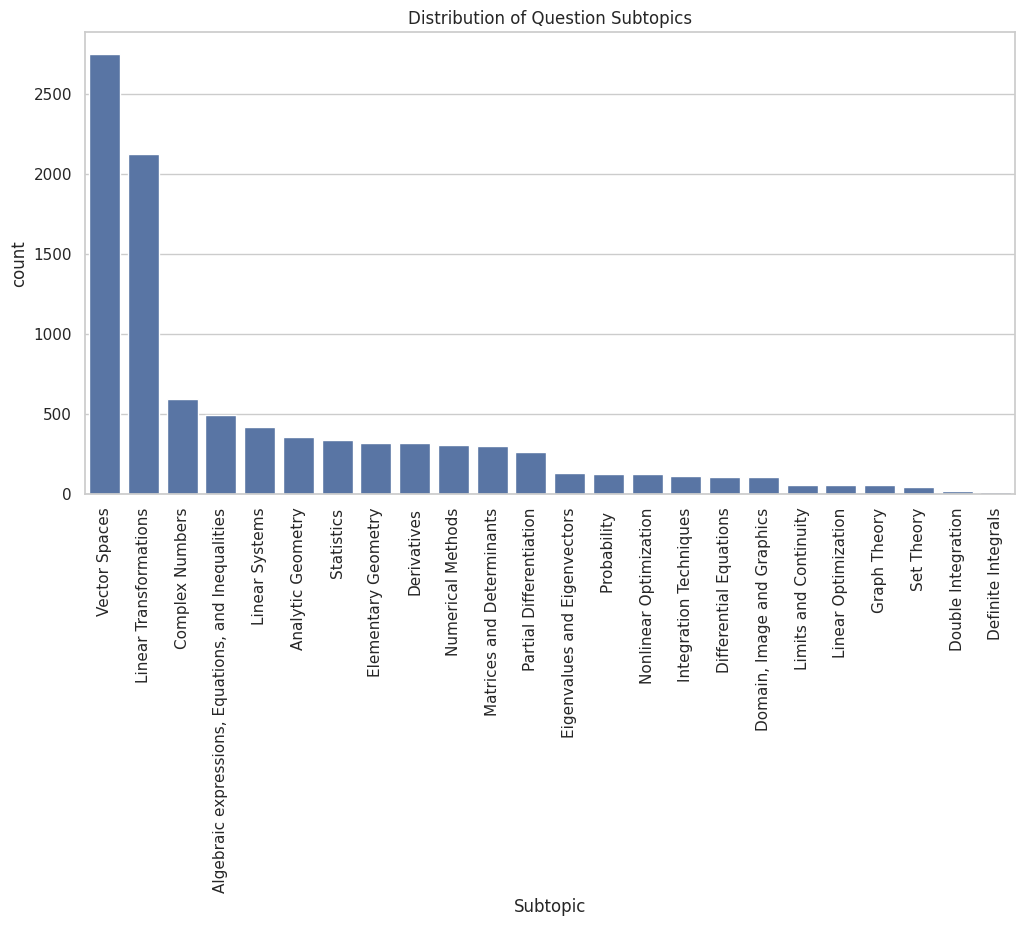

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='Subtopic', order=dataset['Subtopic'].value_counts().index)
plt.title('Distribution of Question Subtopics')
plt.xticks(rotation=90)
plt.show()


# Correlation Analysis

# Correlation Heatmap for Numerical Fields

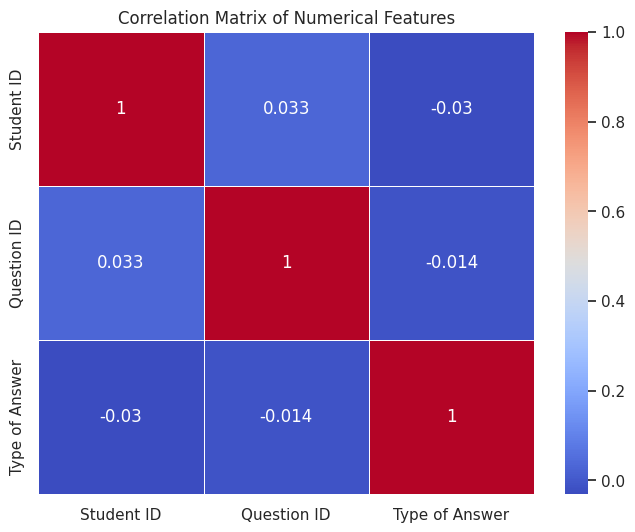

In [33]:
# Select only numeric columns
numeric_data = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# Correlation between Question Level and Answer Type(cross tab)

Type of Answer     0     1
Question Level            
Advanced         849   853
Basic           4227  3617


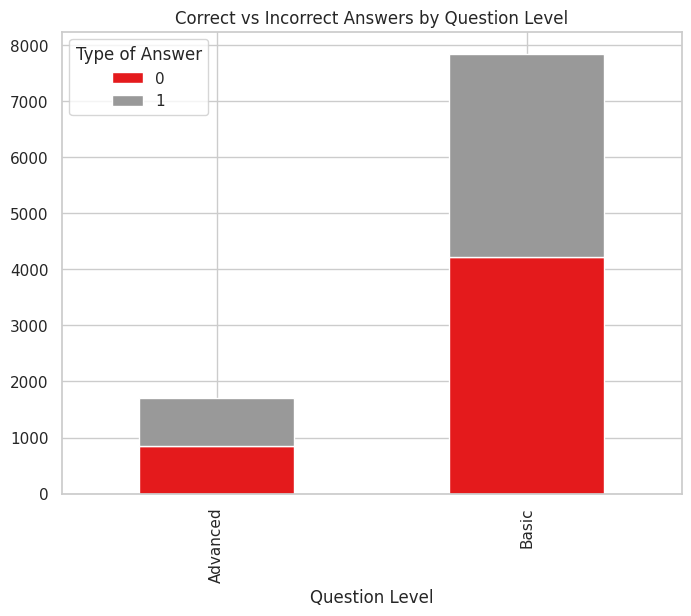

In [34]:
cross_tab = pd.crosstab(dataset['Question Level'], dataset['Type of Answer'])
print(cross_tab)

cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set1')
plt.title('Correct vs Incorrect Answers by Question Level')
plt.show()


# Correlation between Student Country and Answer Type(cross tab)

Type of Answer         0     1
Student Country               
Ireland              162   138
Italy                752   606
Lithuania            814   629
Portugal            3001  2494
Romania               25    35
Russian Federation    70    37
Slovenia             236   519
Spain                 16    12


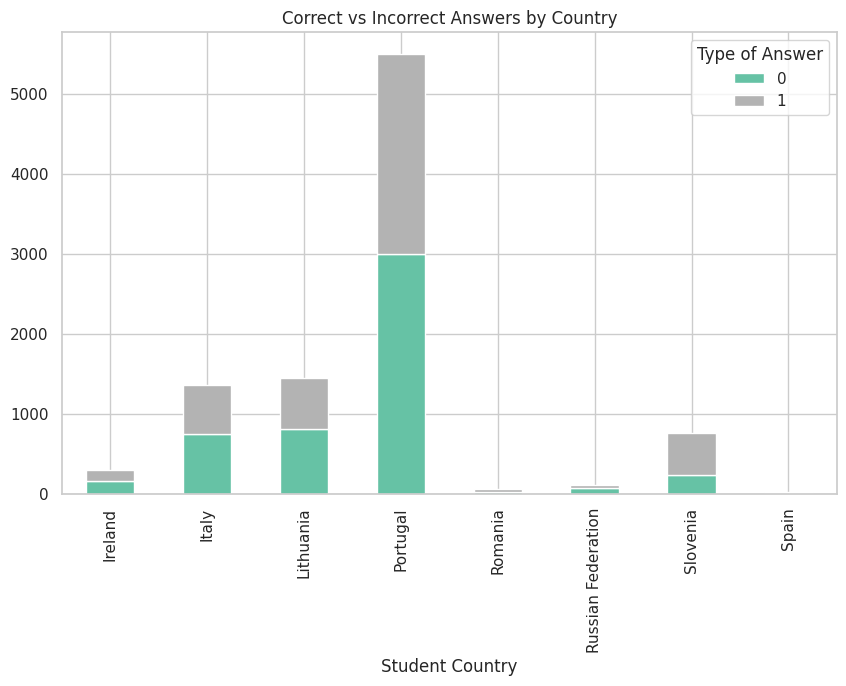

In [35]:
country_performance = pd.crosstab(dataset['Student Country'], dataset['Type of Answer'])
print(country_performance)

country_performance.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Correct vs Incorrect Answers by Country')
plt.xticks(rotation=90)
plt.show()


# Descriptive statistics of the dataset

In [36]:
print(dataset.describe(include='all'))


         Student ID Student Country  Question ID  Type of Answer  \
count   9546.000000            9546  9546.000000     9546.000000   
unique          NaN               8          NaN             NaN   
top             NaN        Portugal          NaN             NaN   
freq            NaN            5495          NaN             NaN   
mean     775.402263             NaN   478.912319        0.468259   
std      460.590559             NaN   249.244061        0.499018   
min       26.000000             NaN    77.000000        0.000000   
25%      380.000000             NaN   323.000000        0.000000   
50%      885.000000             NaN   428.000000        0.000000   
75%     1219.000000             NaN   571.000000        1.000000   
max     1565.000000             NaN  1549.000000        1.000000   

       Question Level           Topic       Subtopic  \
count            9546            9546           9546   
unique              2              14             24   
top            

# Data Preprocessing for Clustering Analysis of Mathematics Learning Patterns

## Handling Missing Values

In [37]:
dataset.isnull().sum()

,0
Student ID,0
Student Country,0
Question ID,0
Type of Answer,0
Question Level,0
Topic,0
Subtopic,0
Keywords,0


In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 1. Label Encoding
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to specified columns
for column in ['Student Country', 'Question Level', 'Topic', 'Subtopic']:
    dataset[column] = label_encoder.fit_transform(dataset[column])

print("Label Encoded Data:")
print(dataset)

Label Encoded Data:
      Student ID  Student Country  Question ID  Type of Answer  \
0            647                0           77               0   
1             41                3           77               1   
2            340                3           77               1   
3            641                1           77               0   
4            669                3           77               1   
...          ...              ...          ...             ...   
9541         175                1         1497               1   
9542         175                1         1514               0   
9543         175                1         1521               0   
9544         175                1         1526               1   
9545         175                1         1549               0   

      Question Level  Topic  Subtopic  \
0                  1     13        22   
1                  1     13        22   
2                  1     13        22   
3                  1   

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#scaler = StandardScaler()  # For standardization
scaler = MinMaxScaler()  # For normalization

# Scale numerical features
numerical_features = ['Question ID']
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

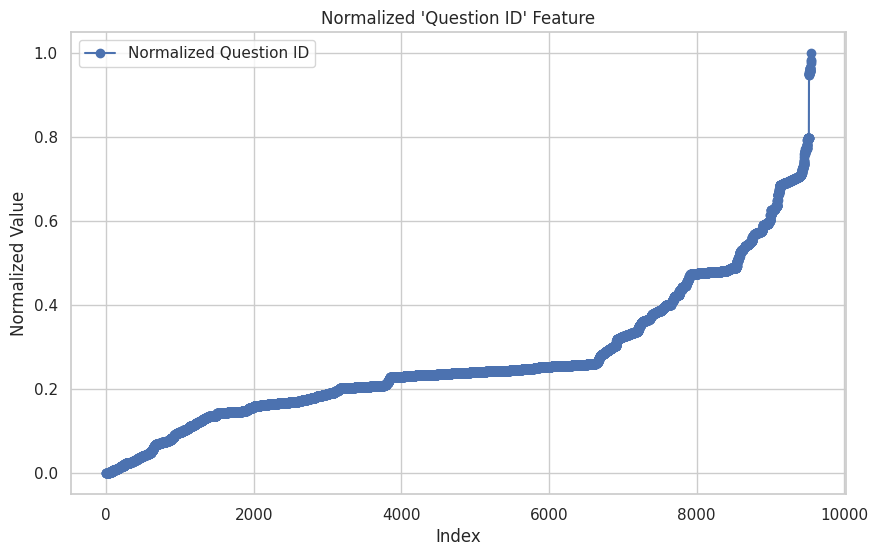

In [40]:
# Plotting the normalized 'Question ID'
plt.figure(figsize=(10, 6))
plt.plot(dataset.index, dataset['Question ID'], marker='o', linestyle='-', color='b', label='Normalized Question ID')
plt.xlabel("Index")
plt.ylabel("Normalized Value")
plt.title("Normalized 'Question ID' Feature")
plt.legend()
plt.grid(True)
plt.show()

In [41]:
print(dataset)

      Student ID  Student Country  Question ID  Type of Answer  \
0            647                0     0.000000               0   
1             41                3     0.000000               1   
2            340                3     0.000000               1   
3            641                1     0.000000               0   
4            669                3     0.000000               1   
...          ...              ...          ...             ...   
9541         175                1     0.964674               1   
9542         175                1     0.976223               0   
9543         175                1     0.980978               0   
9544         175                1     0.984375               1   
9545         175                1     1.000000               0   

      Question Level  Topic  Subtopic  \
0                  1     13        22   
1                  1     13        22   
2                  1     13        22   
3                  1     13        22   
4 

In [42]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Student ID       9546 non-null   int64  
 1   Student Country  9546 non-null   int64  
 2   Question ID      9546 non-null   float64
 3   Type of Answer   9546 non-null   int64  
 4   Question Level   9546 non-null   int64  
 5   Topic            9546 non-null   int64  
 6   Subtopic         9546 non-null   int64  
 7   Keywords         9546 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 596.8+ KB
None


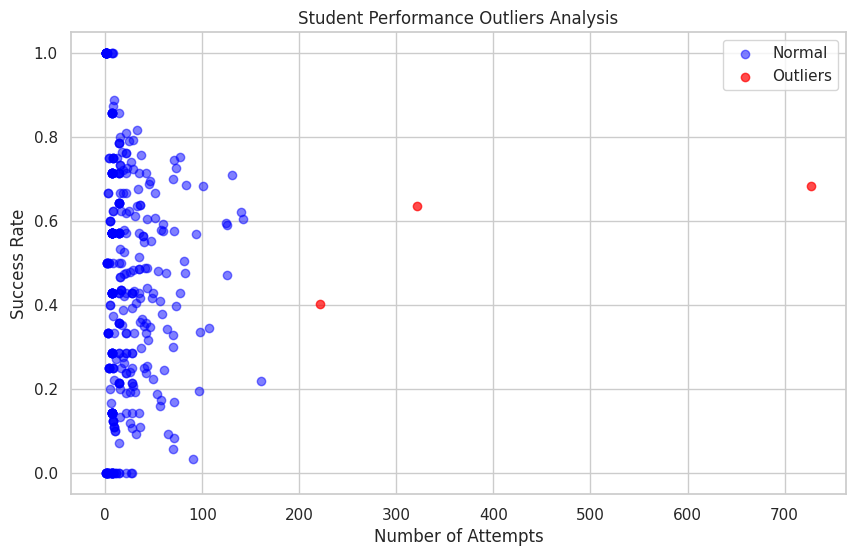


Outlier Summary:
Number of outliers detected: 3
Percentage of outliers: 0.81%

Outlier Statistics:
        Student ID      mean       count
count     3.000000  3.000000    3.000000
mean    493.000000  0.574412  423.000000
std     630.776506  0.150739  267.977611
min      91.000000  0.402715  221.000000
25%     129.500000  0.519114  271.000000
50%     168.000000  0.635514  321.000000
75%     694.000000  0.660260  524.000000
max    1220.000000  0.685007  727.000000


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Calculate student performance metrics
student_performance = dataset.groupby('Student ID')['Type of Answer'].agg([
    'mean',    # success rate
    'count'    # number of attempts
]).reset_index()

# Calculate Z-scores for outlier detection
z_scores = stats.zscore(student_performance[['mean', 'count']])

# Define outliers (|z| > 3)
outliers_mask = (abs(z_scores) > 3).any(axis=1)
outliers = student_performance[outliers_mask]
normal = student_performance[~outliers_mask]

# Create the visualization
plt.figure(figsize=(10, 6))

# Plot normal points
plt.scatter(normal['count'],
           normal['mean'],
           alpha=0.5,
           color='blue',
           label='Normal')

# Plot outlier points
plt.scatter(outliers['count'],
           outliers['mean'],
           color='red',
           alpha=0.7,
           label='Outliers')

# Add labels and title
plt.xlabel('Number of Attempts')
plt.ylabel('Success Rate')
plt.title('Student Performance Outliers Analysis')
plt.legend()

# Show the plot
plt.show()

# Print summary statistics
print("\nOutlier Summary:")
print(f"Number of outliers detected: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers)/len(student_performance))*100:.2f}%")
print("\nOutlier Statistics:")
print(outliers.describe())

Original dataset shape: (9546, 8)
Cleaned dataset shape: (8277, 8)
Number of records removed: 1269
Percentage of data removed: 13.29%


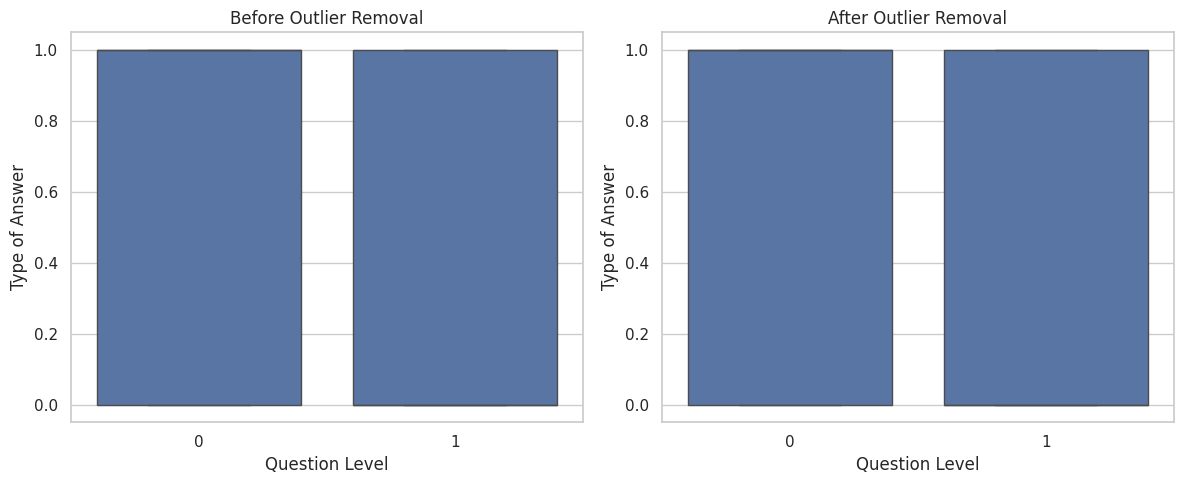


Summary Statistics Comparison:

Before cleaning:
count    9546.000000
mean        0.468259
std         0.499018
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Type of Answer, dtype: float64

After cleaning:
count    8277.000000
mean        0.444485
std         0.496939
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Type of Answer, dtype: float64


In [44]:
# Calculate student performance metrics
student_performance = dataset.groupby('Student ID')['Type of Answer'].agg([
    'mean',    # success rate
    'count'    # number of attempts
]).reset_index()

# Calculate Z-scores for outlier detection
z_scores = stats.zscore(student_performance[['mean', 'count']])

# Define outliers (|z| > 3)
outliers_mask = (abs(z_scores) > 3).any(axis=1)

# Get list of Student IDs that are not outliers
normal_student_ids = student_performance[~outliers_mask]['Student ID']

# Create cleaned dataset by filtering out outlier students
cleaned_dataset = dataset[dataset['Student ID'].isin(normal_student_ids)]

# Print summary of data cleaning
print("Original dataset shape:", dataset.shape)
print("Cleaned dataset shape:", cleaned_dataset.shape)
print("Number of records removed:", len(dataset) - len(cleaned_dataset))
print("Percentage of data removed: {:.2f}%".format(
    (len(dataset) - len(cleaned_dataset)) / len(dataset) * 100
))

# Visualize the impact of outlier removal
plt.figure(figsize=(12, 5))

# Before cleaning
plt.subplot(1, 2, 1)
sns.boxplot(data=dataset, y='Type of Answer', x='Question Level')
plt.title('Before Outlier Removal')

# After cleaning
plt.subplot(1, 2, 2)
sns.boxplot(data=cleaned_dataset, y='Type of Answer', x='Question Level')
plt.title('After Outlier Removal')

plt.tight_layout()
plt.show()

# Save cleaned dataset if needed
# cleaned_dataset.to_csv('cleaned_MathE_dataset.csv', index=False)

# Display summary statistics before and after
print("\nSummary Statistics Comparison:")
print("\nBefore cleaning:")
print(dataset['Type of Answer'].describe())
print("\nAfter cleaning:")
print(cleaned_dataset['Type of Answer'].describe())

Original dataset shape: (9546, 8)
Cleaned dataset shape: (8277, 8)
Number of records removed: 1269
Percentage of data removed: 13.29%


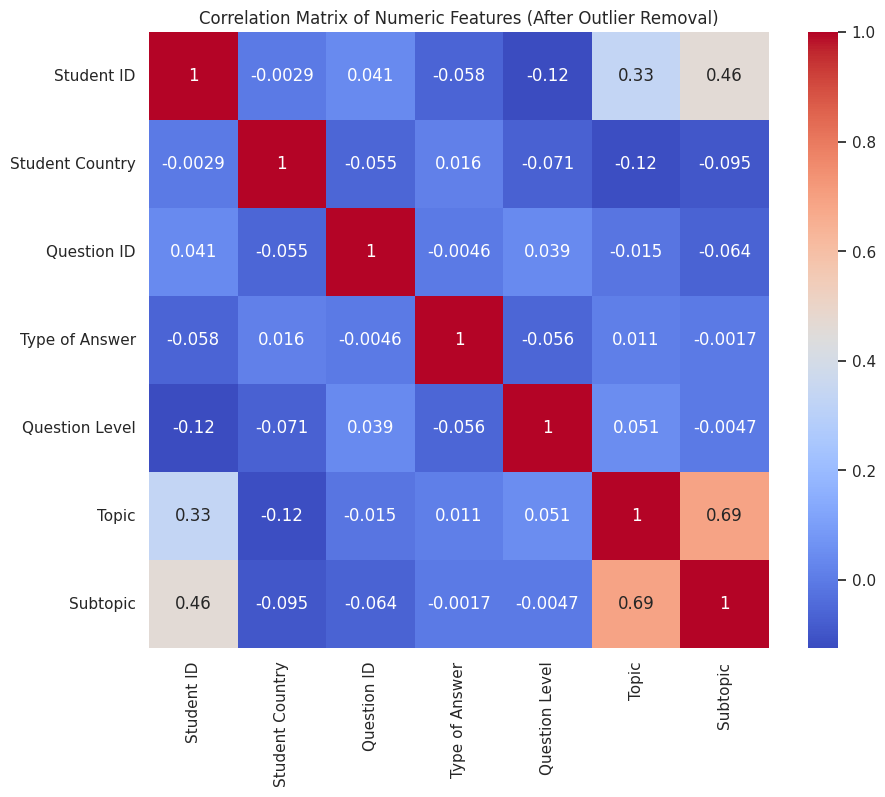

In [45]:
student_performance = dataset.groupby('Student ID')['Type of Answer'].agg([
    'mean',    # success rate
    'count'    # number of attempts
]).reset_index()

# Calculate Z-scores for outlier detection
z_scores = stats.zscore(student_performance[['mean', 'count']])

# Define outliers (|z| > 3)
outliers_mask = (abs(z_scores) > 3).any(axis=1)

# Get list of Student IDs that are not outliers
normal_student_ids = student_performance[~outliers_mask]['Student ID']

# Create cleaned dataset by filtering out outlier students
cleaned_dataset = dataset[dataset['Student ID'].isin(normal_student_ids)]

# Print summary of data cleaning
print("Original dataset shape:", dataset.shape)
print("Cleaned dataset shape:", cleaned_dataset.shape)
print("Number of records removed:", len(dataset) - len(cleaned_dataset))
print("Percentage of data removed: {:.2f}%".format(
    (len(dataset) - len(cleaned_dataset)) / len(dataset) * 100
))

# Select only numeric columns for correlation analysis
numeric_columns = cleaned_dataset.select_dtypes(include=[np.number]).columns
correlation_matrix = cleaned_dataset[numeric_columns].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features (After Outlier Removal)')
plt.show()

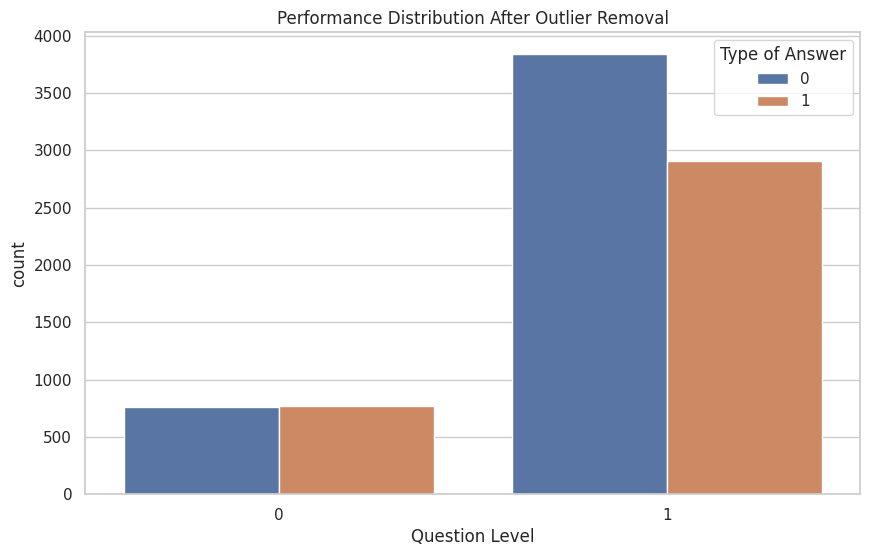

In [46]:
# Performance analysis with cleaned data
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_dataset, x='Question Level', hue='Type of Answer')
plt.title('Performance Distribution After Outlier Removal')
plt.show()

In [47]:
# Country-wise performance analysis
country_performance = cleaned_dataset.groupby('Student Country')['Type of Answer'].mean().sort_values(ascending=False)

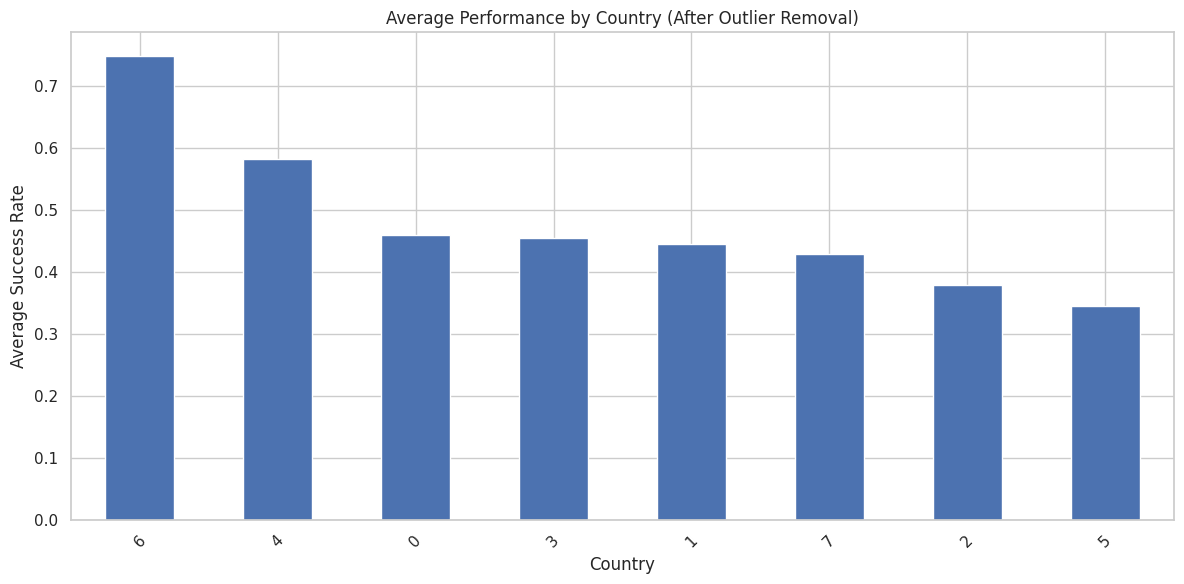


Country-wise Performance Summary:
Student Country
6    0.750000
4    0.583333
0    0.460000
3    0.456011
1    0.446244
7    0.428571
2    0.378788
5    0.345794
Name: Type of Answer, dtype: float64


In [48]:
# Visualize country-wise performance
plt.figure(figsize=(12, 6))
country_performance.plot(kind='bar')
plt.title('Average Performance by Country (After Outlier Removal)')
plt.xlabel('Country')
plt.ylabel('Average Success Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nCountry-wise Performance Summary:")
print(country_performance)

In [49]:
# Additional analysis: Question Level performance
level_performance = cleaned_dataset.groupby('Question Level')['Type of Answer'].agg([
    'mean',
    'count',
    'std'
]).round(3)

print("\nQuestion Level Performance Summary:")
print(level_performance)


Question Level Performance Summary:
                 mean  count    std
Question Level                     
0               0.503   1530  0.500
1               0.431   6747  0.495


# Feature Selection



In [50]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load cleaned dataset
dataset = cleaned_dataset.copy()

# Define target and features
target = 'Type of Answer'  # Target variable
X = dataset.drop(columns=[target, 'Student ID'])  # Exclude target and IDs
y = dataset[target]

# Ensure all columns are numeric
for column in X.select_dtypes(include=['object']).columns:
    X[column] = LabelEncoder().fit_transform(X[column])

# Train-test split for evaluation purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store selected features
selected_features = {}

# 1. Filter Method: Correlation Analysis
correlation = X.corrwith(y).abs().sort_values(ascending=False)
selected_features['correlation'] = correlation.index.tolist()[:5]  # Top 5 features
print("\nTop features by Correlation:")
print(correlation.head())

# 2. Filter Method: Mutual Information
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores_df = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
selected_features['mutual_info'] = mi_scores_df.index.tolist()[:5]
print("\nTop features by Mutual Information:")
print(mi_scores_df.head())

# 3. Wrapper Method: Recursive Feature Elimination (RFE)
log_model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(log_model, n_features_to_select=5)
rfe.fit(X_train, y_train)
selected_features['rfe'] = X.columns[rfe.support_].tolist()
print("\nTop features by Recursive Feature Elimination:")
print(selected_features['rfe'])

# 4. Embedded Method: Random Forest Importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
selected_features['random_forest'] = feature_importances.index.tolist()[:5]
print("\nTop features by Random Forest Importance:")
print(feature_importances.head())

# 5. Embedded Method: Lasso (L1 Regularization)
lasso_model = Lasso(alpha=0.01, max_iter=1000, random_state=42)
lasso_model.fit(X_train, y_train)
lasso_coef = pd.Series(lasso_model.coef_, index=X.columns)
selected_features['lasso'] = lasso_coef[lasso_coef != 0].index.tolist()
print("\nTop features by LASSO Regularization:")
print(selected_features['lasso'])

# Summary of Selected Features
print("\nSummary of Selected Features:")
for method, features in selected_features.items():
    print(f"{method}: {features}")



Top features by Correlation:
Question Level     0.055707
Student Country    0.016097
Topic              0.010830
Question ID        0.004610
Subtopic           0.001733
dtype: float64

Top features by Mutual Information:
Question ID        0.020590
Keywords           0.009564
Student Country    0.005757
Topic              0.005664
Question Level     0.001301
dtype: float64

Top features by Recursive Feature Elimination:
['Student Country', 'Question ID', 'Question Level', 'Topic', 'Subtopic']

Top features by Random Forest Importance:
Question ID        0.473920
Keywords           0.239359
Student Country    0.167703
Subtopic           0.058453
Topic              0.043578
dtype: float64

Top features by LASSO Regularization:
['Question Level', 'Topic', 'Subtopic', 'Keywords']

Summary of Selected Features:
correlation: ['Question Level', 'Student Country', 'Topic', 'Question ID', 'Subtopic']
mutual_info: ['Question ID', 'Keywords', 'Student Country', 'Topic', 'Question Level']
rfe: ['

In [12]:
# Summary statistics for selected features
selected_features = ['Question Level', 'Student Country', 'Question ID', 'Topic', 'Subtopic']

print("Descriptive Statistics for Selected Features:")
print(dataset[selected_features + ['Type of Answer']].describe())


Descriptive Statistics for Selected Features:
       Question Level  Student Country  Question ID        Topic     Subtopic  \
count     8277.000000      8277.000000  8277.000000  8277.000000  8277.000000   
mean         0.815150         2.484354     0.278216     6.154766    14.264226   
std          0.388199         0.997897     0.179041     2.865115     7.867845   
min          0.000000         0.000000     0.000000     0.000000     0.000000   
25%          1.000000         2.000000     0.164402     4.000000     8.000000   
50%          1.000000         3.000000     0.238451     7.000000    15.000000   
75%          1.000000         3.000000     0.377717     7.000000    23.000000   
max          1.000000         7.000000     1.000000    13.000000    23.000000   

       Type of Answer  
count     8277.000000  
mean         0.444485  
std          0.496939  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          1.000000  
max          1.000000  


# Correlation between selected features and target

In [13]:
# Correlation between selected features and target
correlations = dataset[selected_features + ['Type of Answer']].corr()
print("\nCorrelation Matrix:")
print(correlations['Type of Answer'].sort_values(ascending=False))



Correlation Matrix:
Type of Answer     1.000000
Student Country    0.016097
Topic              0.010830
Subtopic          -0.001733
Question ID       -0.004610
Question Level    -0.055707
Name: Type of Answer, dtype: float64


# Feature Importances from Random Forest


Feature Importances from Random Forest:
Question ID        0.768413
Student Country    0.116857
Subtopic           0.057868
Topic              0.041020
Question Level     0.015842
dtype: float64


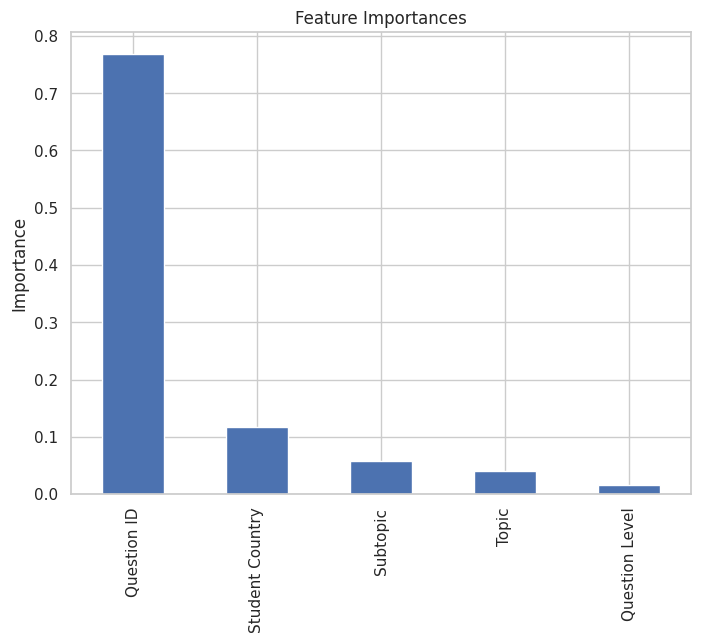

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train[selected_features], y_train)

# Feature importance
importances = pd.Series(rf_model.feature_importances_, index=selected_features)
importances.sort_values(ascending=False, inplace=True)

print("\nFeature Importances from Random Forest:")
print(importances)

# Visualization
importances.plot(kind='bar', title='Feature Importances', figsize=(8, 6))
plt.ylabel('Importance')
plt.show()


# Chi-Square Test

In [51]:
from scipy.stats import chi2_contingency

print("\nChi-Square Test Results:")
for feature in ['Question Level', 'Student Country', 'Topic', 'Subtopic']:
    contingency_table = pd.crosstab(dataset[feature], dataset['Type of Answer'])
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    print(f"{feature}: Chi2 = {chi2:.3f}, p-value = {p:.3f}")



Chi-Square Test Results:
Question Level: Chi2 = 25.398, p-value = 0.000
Student Country: Chi2 = 42.278, p-value = 0.000
Topic: Chi2 = 66.877, p-value = 0.000
Subtopic: Chi2 = 120.045, p-value = 0.000


# ANOVA Test for Question ID

In [52]:
from scipy.stats import f_oneway

anova_result = f_oneway(
    *[dataset['Type of Answer'][dataset['Question ID'] == value]
      for value in dataset['Question ID'].unique()]
)
print(f"\nANOVA Test for Question ID: F-statistic = {anova_result.statistic:.3f}, p-value = {anova_result.pvalue:.3f}")



ANOVA Test for Question ID: F-statistic = 1.428, p-value = 0.000


# Hierarchical Clustering

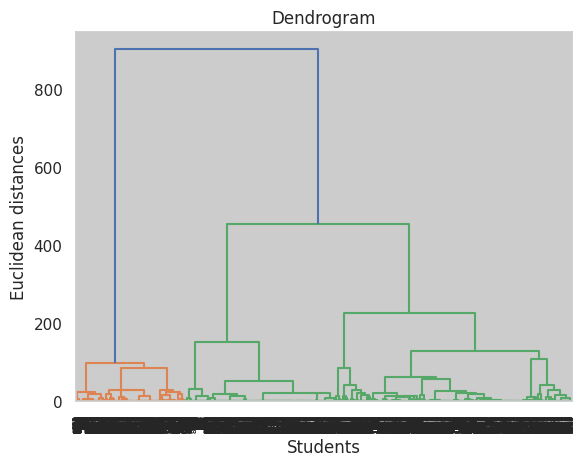

In [65]:
# Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Select features for clustering
features_for_clustering = ['Question Level', 'Student Country', 'Question ID', 'Topic', 'Subtopic']
X_cluster = cleaned_dataset[features_for_clustering]

# Apply hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(X_cluster, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Students')
plt.ylabel('Euclidean distances')
plt.show()


# DBSCAN clustering

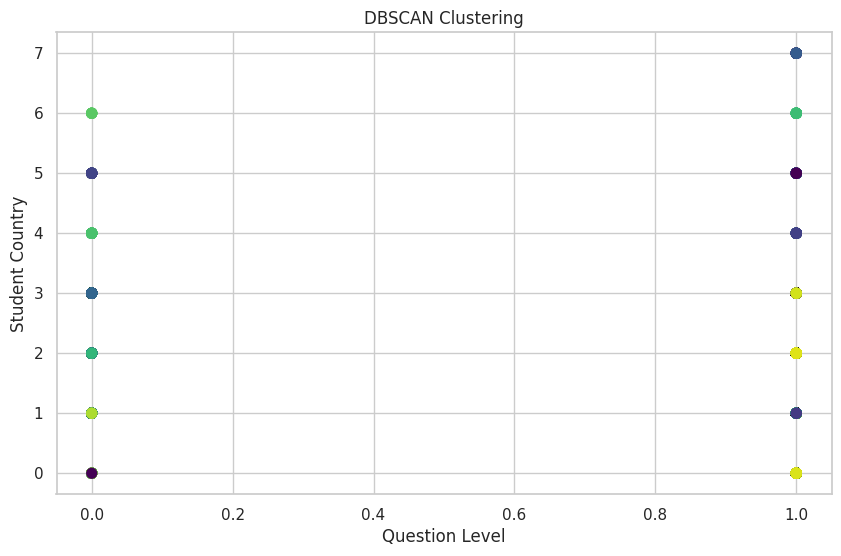

In [16]:
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt

# Select features for clustering
features_for_clustering = ['Question Level', 'Student Country', 'Question ID', 'Topic', 'Subtopic']
X_cluster = cleaned_dataset[features_for_clustering]

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_cluster)

# Visualize clusters (with first two features)
plt.figure(figsize=(10, 6))
plt.scatter(X_cluster.iloc[:, 0], X_cluster.iloc[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel(features_for_clustering[0])
plt.ylabel(features_for_clustering[1])
plt.show()



# Elbow Method for Optimal k

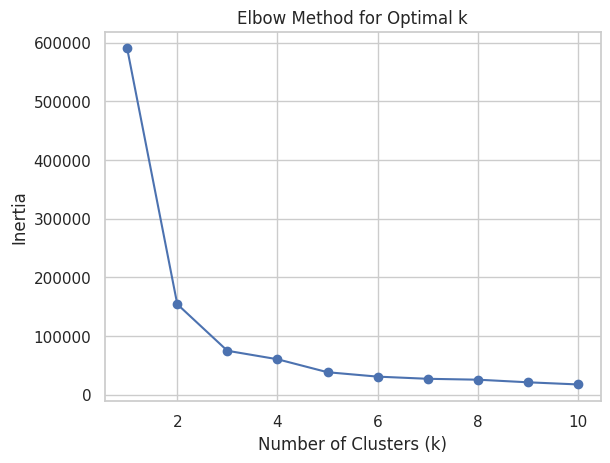

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select features for clustering
cluster_features = ['Question Level', 'Student Country', 'Question ID', 'Topic', 'Subtopic']

# Determine optimal number of clusters (using elbow method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset[cluster_features])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()



In [63]:
# Perform K-means clustering with optimal k
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(dataset[cluster_features])

In [64]:
# Evaluate cluster quality (using silhouette score)
silhouette_avg = silhouette_score(dataset[cluster_features], dataset['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.6170


# Model Comparison

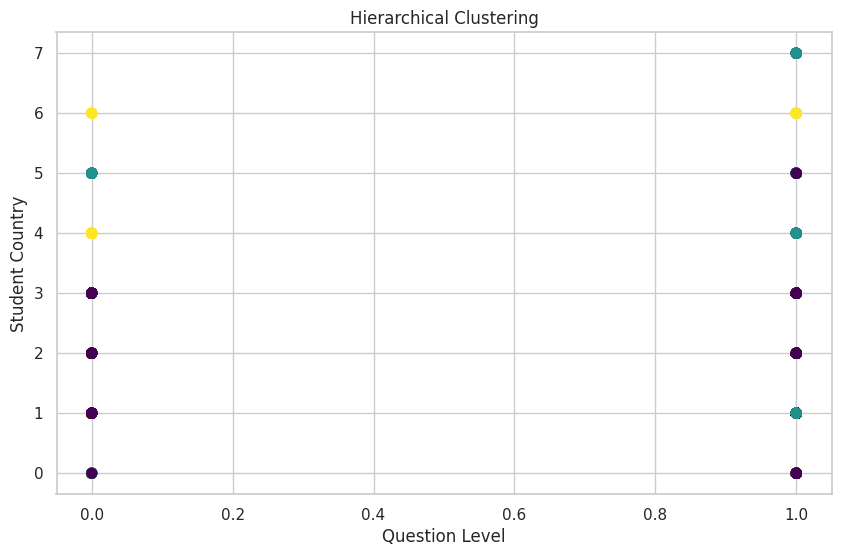


Hierarchical Cluster Analysis:
        Type of Answer      
                  mean count
Cluster                     
0             0.455584  3940
1             0.428339  1842
2             0.438878  2495
Hierarchical Silhouette Score: 0.6052


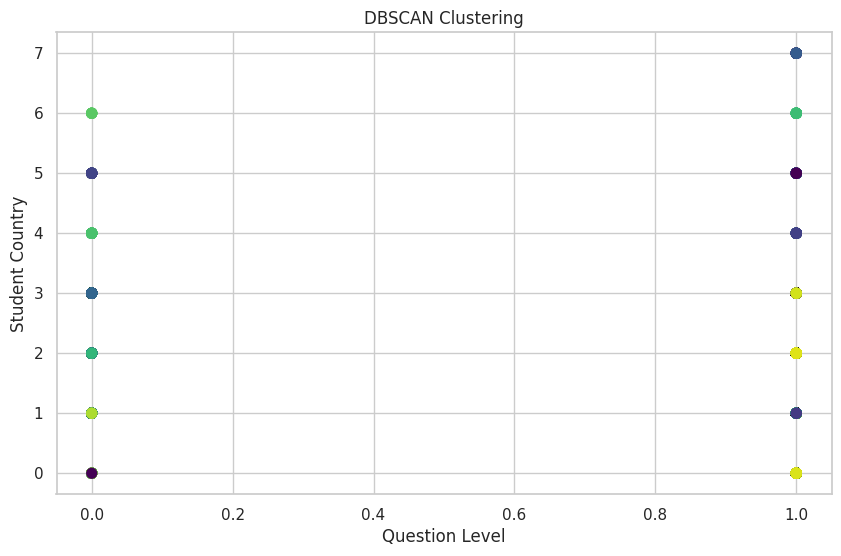


DBSCAN Cluster Analysis:
        Type of Answer      
                  mean count
Cluster                     
-1            0.375000    48
 0            0.402985    67
 1            0.531100   209
 2            0.339623    53
 3            0.500000     8
...                ...   ...
 100          0.510638    47
 101          0.523810    21
 102          0.857143     7
 103          0.714286    14
 104          0.733333    15

[106 rows x 2 columns]
DBSCAN Silhouette Score: 0.8970


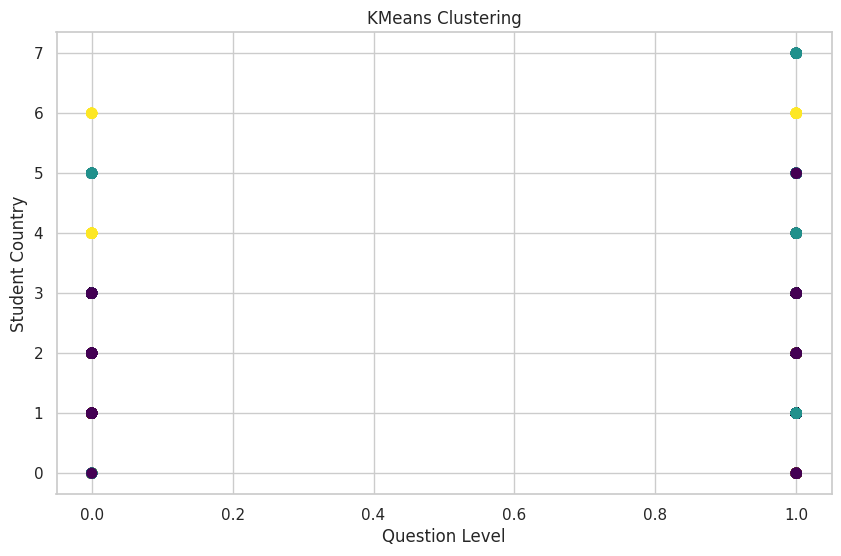


KMeans Cluster Analysis:
        Type of Answer      
                  mean count
Cluster                     
0             0.457828  3794
1             0.429570  1860
2             0.435761  2623
KMeans Silhouette Score: 0.6170

Summary of Silhouette Scores
Hierarchical Clustering: 0.6051609243237689
DBSCAN: 0.8969959437931226
KMeans: 0.6170315937621726


In [59]:
# Function to perform and evaluate clustering
def perform_clustering(model, X_cluster, dataset, model_name):
    y_pred = model.fit_predict(X_cluster)
    dataset['Cluster'] = y_pred

    # Visualize clusters (with first two features)
    plt.figure(figsize=(10, 6))
    plt.scatter(X_cluster.iloc[:, 0], X_cluster.iloc[:, 1], c=y_pred, s=50, cmap='viridis')
    plt.title(f'{model_name} Clustering')
    plt.xlabel(features_for_clustering[0])
    plt.ylabel(features_for_clustering[1])
    plt.show()

    # Analyze the clusters
    cluster_analysis = dataset.groupby('Cluster').agg({'Type of Answer': ['mean', 'count']})
    print(f"\n{model_name} Cluster Analysis:\n{cluster_analysis}")

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(X_cluster, y_pred)
    print(f"{model_name} Silhouette Score: {silhouette_avg:.4f}")

    return dataset


# Select features for clustering
features_for_clustering = ['Question Level', 'Student Country', 'Question ID', 'Topic', 'Subtopic']
X_cluster = cleaned_dataset[features_for_clustering]


# 1. Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
cleaned_dataset = perform_clustering(hc, X_cluster, cleaned_dataset.copy(), "Hierarchical")


# 2. DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5) # You might need to tune eps and min_samples
cleaned_dataset = perform_clustering(dbscan, X_cluster, cleaned_dataset.copy(), "DBSCAN")


# 3. K-Means Clustering
optimal_k = 3  #  value from elbow method


kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cleaned_dataset = perform_clustering(kmeans, X_cluster, cleaned_dataset.copy(), "KMeans")

# Print a summary of silhouette scores
print("\nSummary of Silhouette Scores")
print(f"Hierarchical Clustering: {silhouette_score(X_cluster, hc.fit_predict(X_cluster))}")
print(f"DBSCAN: {silhouette_score(X_cluster, dbscan.fit_predict(X_cluster))}")
print(f"KMeans: {silhouette_score(X_cluster, kmeans.fit_predict(X_cluster))}")